In [198]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

To approximate the solution of the mth-order system of initil value 

$ u'_{j}  = f_{j} (t,u_{1}, u_{2}, ..., u_{m}) ,\  a\leq t \leq b ,\ with  \ u_{j}(a) = \alpha_{j}$

Using a simple pendulum as an example. The langranian function is given by:

$$
L = T - U
$$
where:

    T: kinetic energy

    U: potential energy
    
So, for a simple pendulum we have:

$$
L = \frac{1}{2}ml^2 \dot{\theta}^2 + mgl\cos{\theta}
$$

Using the Euler-Lagrange equation, we can obtain the equation of motion for our system:

$$
\ddot{\theta} = - \frac{g}{l}\sin{\theta}
$$

With the first approximation of $sin(\theta) \approx \theta$
$$
\ddot{\theta(t)} = -\frac{g}{l}\theta(t)
$$

With these equation, we can using a substitution to find an approximation to $\theta(t)$. So:

$$
u_1(t) = \theta(t) \\ u_2(t) = \dot{\theta(t)} 
$$

Derivating each equation:

$$
\dot{u_1(t)} = \dot{\theta(t)} = u_2(t)\\ \dot{u_2(t)} = \ddot{\theta(t)} = -\frac{g}{l}\theta = -\frac{g}{l}u_1(t)
$$

In [249]:
# Set the functions


#t : number of points in the horizontal axis
# u1 : solution of the position (in this case)
# u2 : solution of the velocity (in this case)



def F1(t,u1,u2):  
    return u2

def F2(t,u1,u2):
    
    # l : length of the string
    # g : aceleration due to gravity
    
    l = 1
    g = 9.8
    
    return -g/l*u1

In [334]:
def RK4des(a,b,N):
    #Set the initial conditions
    # w1 : u_1(0) initial condition to angular position
    # w2 : u_2(0) initial condition to angular velocity
    
    w1 = np.pi/2    
    w2 = 0      
    h = (b-a)/N
    
    
    tpoints = np.arange(a,b,h)
    u1points = []
    u2points = []
    
    
    for t in tpoints:
        u1points.append(w1)
        u2points.append(w2)
        
        m1 = h*F1(t,w1,w2) #k11
        k1 = h*F2(t,w1,w2) #k12
        
        m2 = h*F1(t + h/2, w1 + m1/2, w2 + k1/2 ) #k21
        k2 = h*F2(t + h/2, w1 + k1/2, w2 + k1/2) #k22
        
        m3 = h*F1(t + h/2, w1 + m2/2, w2 + k2/2) #k31
        k3 = h*F2(t + h/2, w1 + k2/2, w2 + k2/2) #k32
        
        m4 = h*F1(t + h, w1 + m3, w2 + k3) #k41
        k4 = h*F2(t + h, w1 + m3, w2 + k3) #k42
        
        w1 += (m1 + 2*m2 + 2*m3 + m4)/6
        w2 += (k1 + 2*k2 + 2*k3 + k4)/6
    
    
    #Plotting the graph
    sns.set_style('whitegrid')
    plt.plot(tpoints, u1points)
    plt.plot(tpoints, u2points)
    #plt.plot(tpoints,np.sin(tpoints)/np.pi) #analytical solution
    plt.xlabel('t')
    plt.ylabel('y')
    plt.legend(['u1 = Position', 'u2 = Velocity'])


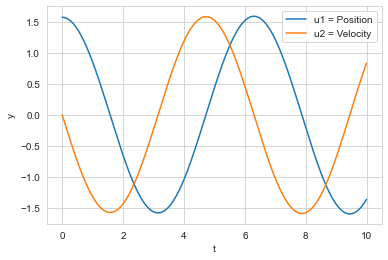

In [336]:
RK4des(0,10,1000)